# Importing and loading the data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

profiles = pd.read_csv('profiles.csv')
print(profiles.head())
print(profiles.age.count())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

# Exploring the data

In [3]:
print(profiles.columns)

print(profiles.drinks.value_counts())
#print(profiles.status.value_counts())
#print(profiles.orientation.value_counts())
#print(profiles.sex.value_counts())
#print(profiles.age.value_counts())
print(profiles.education.value_counts())
#print(profiles.drugs.value_counts())
#print(profiles.sign.value_counts())
#print(profiles.smokes.value_counts())
#print(profiles.body_type.value_counts())
#print(profiles.income.value_counts())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                

# Cleaning the data

First I am going to create new columns in the dataset with some mapping. 

In [4]:

profiles['drinks_code'] = profiles["drinks"].map({"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5})
profiles['drugs_code'] = profiles["drugs"].map({"never": 0, "sometimes": 1, "often": 2})
profiles['smoke_code'] = profiles["smokes"].map({"no": 0, "when drinking": 2, "sometimes": 3, "yes": 4, "trying to quit": 1})
profiles['sign_code'] = profiles["sign"].map({"leo": 0, "leo and it&rsquo;s fun to think about": 0, "leo but it doesn&rsquo;t matter": 0,'leo and it matters a lot':0, "libra": 1, "libra and it&rsquo;s fun to think about": 1, 'libra but it doesn&rsquo;t matter':1, 'libra and it matters a lot':1, 'cancer': 2,'cancer and it matters a lot':2, 'cancer and it&rsquo;s fun to think about':2, 'cancer but it doesn&rsquo;t matter':2, 'virgo':3, 'virgo and it matters a lot':3, 'virgo and it&rsquo;s fun to think about ':3, 'virgo but it doesn&rsquo;t matter':3, 'scorpio':4, 'scorpio and it matters a lot':4, 'scorpio but it doesn&rsquo;t matter':4, 'scorpio and it&rsquo;s fun to think about':4, 'gemini':5,'gemini and it matters a lot':5,  'gemini and it&rsquo;s fun to think about':5, 'gemini but it doesn&rsquo;t matter':5, 'taurus':6, 'tauros and it matters a lot':6,'taurus and it&rsquo;s fun to think about':6, 'taurus but it doesn&rsquo;t matter':6, 'aries':7, 'aries and it matters a lot':7, 'aries and it&rsquo;s fun to think about':7, 'aries but it doesn&rsquo;t matter':7, 'pisces':8, 'pisces and it matters a lot':8,'pisces and it&rsquo;s fun to think about':8, 'pisces and it matters a lot':8,'pisces but it doesn&rsquo;t matter':8, 'aquarius':9, 'aquarius and it matters a lot':9,'aquarius and it&rsquo;s fun to think about':9, 'aquarius but it doesn&rsquo;t matter':9, 'sagittarius':10, 'sagittarius and it matters a lot':10,'sagittarius and it&rsquo;s fun to think about':10, 'sagittarius but it doesn&rsquo;t matter':10, 'sagittarius and it matters a lot':10, 'capricorn':11, 'capricorn and it&rsquo;s fun to think about':11, 'capricorn but it doesn&rsquo;t matter':11, 'capricorn and it matters a lot':11  })
profiles['sex_code'] = profiles["sex"].map({"m": 0, "f": 1})
profiles['body_code'] = profiles['body_type'].map({"average": 5, "fit": 1, "athletic": 0, "thin": 3, "curvy": 4, "a little extra":6, "skinny": 2,
                "full figured": 7, "overweight": 8, "jacked": 9, "used up": 10, "rather not say": 11})
profiles['education_code'] = profiles['education'].map({"graduated from college/university": 4,
               "graduated from masters program": 5,
               "working on college/university": 4,
               "working on masters program": 5,
               "graduated from two-year college": 3,
               "graduated from high school": 2,
               "graduated from ph.d program": 6,
               "graduated from law school": 7,
               "working on two-year college": 3,
               "dropped out of college/university": 2,
               "working on ph.d program": 6,
               "college/university": 4,
               "graduated from space camp": 7,
               "dropped out of space camp": 4,
               "graduated from med school": 7,
               "working on space camp": 7,
               "working on law school": 7,
               "two-year college": 3,
               "working on med school": 7,
               "dropped out of two-year college": 2,
               "dropped out of masters program": 3,
               "masters program": 5,
               "dropped out of ph.d program": 5,
               "dropped out of high school": 1,
               "high school": 2,
               "working on high school": 2,
               "space camp": 7,
               "ph.d program": 6,
               "law school": 7,
               "dropped out of law school": 4,
               "dropped out of med school": 4,
               "med school": 7  })


In [5]:
profiles["income_code"] = profiles.income.apply(lambda x: np.nan if (x == -1) else x)        
    


# Working on open-ended questions in dating profiles 

In [6]:
# data on total length of essay responses
essay_columns = ["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]

# Removing the NaNs
all_essays = profiles[essay_columns].replace(np.nan, '', regex=True)

# Combining the essays
all_essays = all_essays[essay_columns].apply(lambda x: ' '.join(x), axis=1)

# average length of all essay responses
all_essays_split = all_essays.str.split()


def avg_word_length(essay):
    total_letters = 0
    num_words = 0
    if len(essay) == 0:
        return 0
    else:
        for word in essay:
            total_letters += len(word)
            num_words += 1
        return total_letters / num_words
    
# Creating columns with the length of essays

profiles["avg_word_length"] = all_essays_split.apply(lambda x: avg_word_length(x))
     
profiles["essay_len"] = all_essays.apply(lambda x: len(x))


Counting the amount of times each person talked about herself/himself by counting the words 'I' or 'me' in their answers.

In [7]:
profiles['me_count'] = all_essays.str.count("I|me|i")

Combining the mapped data into a new dataset:

In [8]:
feature_data = profiles[['age', "drinks_code", "drugs_code",'smoke_code', 'body_code', 'education_code', "sign_code", "sex_code", 'income_code', 'me_count', 'essay_len']]
feature_data = pd.DataFrame(feature_data)


# Dropping the NaNs
feature_data = feature_data.dropna().reset_index()

# Creating a new column in order to separate incomes into 2 groups: incomes grater and less than $50000
feature_data['inc'] = feature_data['income_code'].apply(lambda x: 1 if x > 50000.0 else 0)

# Checking if there are any NaNs left in the new table
print(feature_data.isnull().values.any())

# Checking the length of the table and exploring a bit more
print(len(feature_data["body_code"]))
print(feature_data.head())
print(feature_data.inc.value_counts())
print(feature_data.age.count())

False
7254
   index  age  drinks_code  drugs_code  smoke_code  body_code  education_code  \
0      1   35          3.0         1.0         0.0        5.0             7.0   
1     11   28          2.0         0.0         0.0        5.0             4.0   
2     14   29          2.0         0.0         0.0        3.0             4.0   
3     66   22          1.0         0.0         0.0        0.0             4.0   
4     72   35          2.0         1.0         0.0        0.0             7.0   

   sign_code  sex_code  income_code  me_count  essay_len  inc  
0        2.0         0      80000.0       103       1453    1  
1        0.0         0      40000.0       324       4629    0  
2        6.0         1      50000.0       159       2609    0  
3        3.0         0      20000.0        33        397    0  
4        8.0         0     150000.0       210       2864    1  
0    3973
1    3281
Name: inc, dtype: int64
7254




# Data visualisation
        

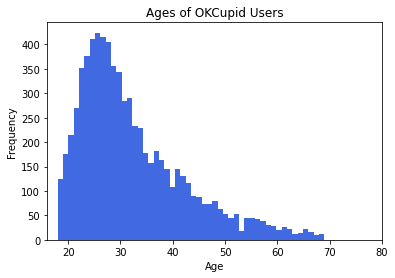

In [9]:

plt.hist(feature_data.age, bins=50, color = '#4169E1')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Ages of OKCupid Users")
plt.xlim(16, 80)
plt.savefig("ages.png")
plt.show()

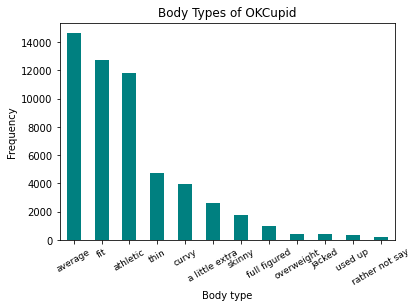

In [10]:

body_type = pd.value_counts(profiles["body_type"].values, sort=True)
ax = body_type.plot(kind='bar', title='Body Types of OKCupid', color = '#008080')
ax.set(xlabel='Body type', ylabel='Frequency')
plt.xticks(fontsize=9, rotation=30)

plt.show()


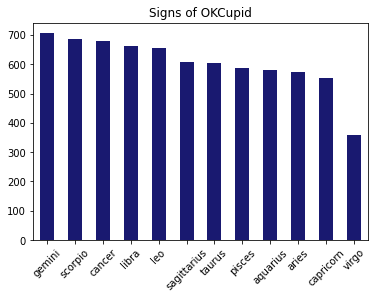

In [11]:

labels = ['gemini', 'scorpio', 'cancer','libra', 'leo', 'sagittarius', 'taurus', 'pisces', 'aquarius', 'aries', 'capricorn', 'virgo' ]
sign = pd.value_counts(feature_data["sign_code"].values, sort=True)
#plt.figure(figsize=(10,8))
ax = sign.plot(kind='bar', title='Signs of OKCupid', color = '#191970')


plt.xticks(fontsize=10, rotation=45)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.show()

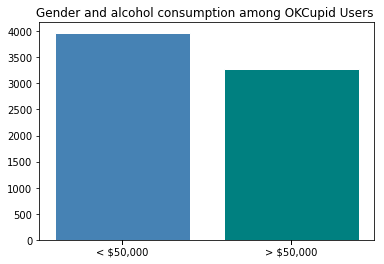

In [12]:
ax = plt.subplot()
colors = ['#4682B4', '#008080']
sns.set_style('darkgrid')
plt.bar( range(0,2), feature_data.inc.value_counts(), color = colors)
ax.set_xticks(feature_data.inc)
ax.set_xticklabels(['> $50,000', '< $50,000'])
plt.title('Gender and alcohol consumption among OKCupid Users ')

plt.show()

In [13]:
df = feature_data[['drinks_code', 'sex_code', 'age']]
df = df.groupby(['sex_code','drinks_code' ]).age.count().reset_index()

category_pivot = df.pivot(columns='sex_code',
                                      index='drinks_code',
                                      values='age')\
                                .reset_index()
category_pivot.columns = ['Drink_code', 'Men', 'Women' ]
print(category_pivot)

   Drink_code   Men  Women
0         0.0   409    162
1         1.0   679    285
2         2.0  3454   1405
3         3.0   500    203
4         4.0    74     33
5         5.0    33     17


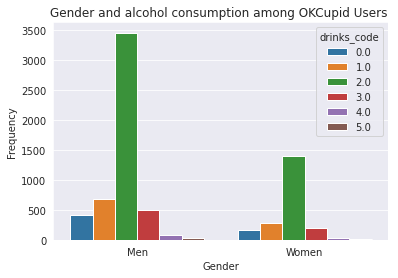

In [14]:
ax = plt.subplot()
sns.barplot(data=df, x='sex_code',  y='age', hue="drinks_code")
plt.title('Gender and alcohol consumption among OKCupid Users ')
ax.set(xlabel='Gender', ylabel='Frequency')
ax.set_xticklabels(['Men', 'Women'])
plt.show()

Reminder: "not at all" - 0, "rarely" - 1, "socially" - 2, "often" - 3, "very often" - 4, "desperately" - 5

In [15]:
# I want to compare gender and alcohol consumption among OKCupid users, but this time I will only consider those users who drink alcohol, excluding those who don't. 
# Therefore I am going to create a column where I will only assign 1 to the users who consume alcohol. 

feature_data['drink_alc'] = profiles["drinks"].map({"not at all": np.nan, "rarely": np.nan, "socially": 1, "often": 1, "very often": 1, "desperately": 1})
print(feature_data["drink_alc"].value_counts())

# Here I am merging 'sex_code' and 'drink_alc' together so I can compare alcohol consumption among the genders. 
df = feature_data[['sex_code','drink_alc']]
df = df.dropna().reset_index(drop= True)

grouped = df.groupby('sex_code').drink_alc.count().reset_index()

print(grouped)




1.0    5785
Name: drink_alc, dtype: int64
   sex_code  drink_alc
0         0       4121
1         1       1664


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gender')]

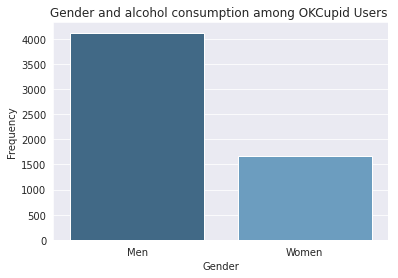

In [16]:
ax = plt.subplot()
sns.barplot(data = grouped, x='sex_code', y = 'drink_alc', estimator =np.sum, ci = 'sd', palette="Blues_d")
ax.set_xticks(range(0,2))
ax.set_xticklabels(['Men', 'Women'])
plt.title('Gender and alcohol consumption among OKCupid Users ')
ax.set(xlabel='Gender', ylabel='Frequency')

# Heat map

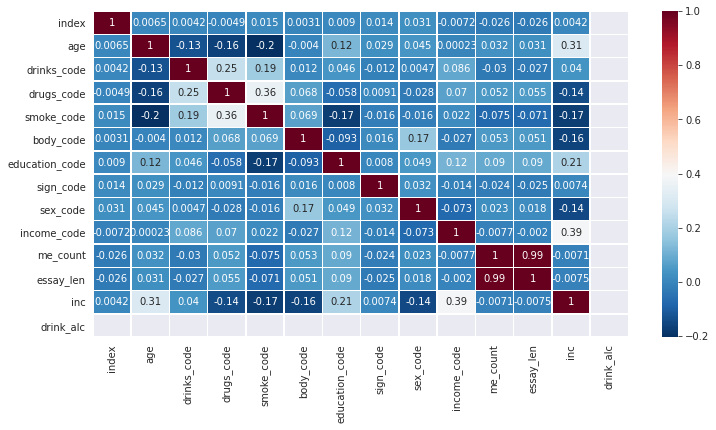

In [17]:

correlation =  feature_data.corr()

plt.figure(figsize =(12,6))
sns.heatmap(correlation, 
            xticklabels= correlation.columns,
            yticklabels= correlation.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

As we can see there's no significant correlation between the variables, the linear regression model won't be useful to answer my question

# Question 

I would like to understand if I can build a reliable statistical model based on such features as: drinking & smoking habits, drug abuse, body type, income, essay length and the amount of times a person said 'me' or 'I' in open-ended questions in order to predict gender.

Choosing the features that I am going to use for training my statistical models in an array:

In [18]:
data = feature_data[["drinks_code", "drugs_code",'smoke_code', 'body_code', 'income_code', 'me_count', 'essay_len']]
labels = feature_data['sex_code']



# K-Nearest Neighbors 

Since the data needs to be normalised to use the machine learning K-Nearest Neighbors model, I am first going to scale it.

In [19]:
x = data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


scaled_data = pd.DataFrame(x_scaled, columns=data.columns)

Splitting the data into the training and test sets:

In [20]:
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(scaled_data.values, labels,  test_size = 0.2, random_state = 100)

Building the KNN model with the best k-value:

In [21]:

highest_score = 0
k_list = range(1, 101)

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)  

  if highest_score < classifier.score(validation_data, validation_labels):
    highest_score = classifier.score(validation_data, validation_labels)
    best_k = k

classifier = KNeighborsClassifier(n_neighbors = best_k)
classifier.fit(training_data, training_labels)
guesses = classifier.predict(validation_data) 
print(best_k)

6


In [22]:
print(classifier.score(validation_data, validation_labels))

0.7615437629221227


Using the KNN model we got an accuracy of 76%, Although the expected accuracy for a model to be working is 75%, I would want accuracy to be at least 80% to make sure predictions, therefore I will explore the same training data using different models to compare their accuracy.

# Random Forests

In [23]:
training_set, test_set, training_labels, test_labels = train_test_split(data, labels,  test_size = 0.2, random_state = 100)

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 2000, random_state = 0)

classifier.fit(training_set, training_labels)

print(classifier.score(test_set, test_labels))


0.7560303239145417


The Random Forests model's score is 75%, which is 1% less than the KNN model. 

# Logistic Regression

Normalising the data for Logistic Rgression model:

In [25]:
scaler = StandardScaler()
train_features = scaler.fit_transform(training_set)
test_features = scaler.transform(test_set)

Building the model:

In [26]:
model = LogisticRegression()
model.fit(train_features, training_labels)
model.score(test_features, test_labels)

0.6905582356995176

The Logistic Regression model showed the score of 69%, which means that this model cannot be used with my training data to predict gender. 

# Linear regression

In [27]:
lr= LinearRegression()
lr.fit(training_set, training_labels)
y_predict = lr.predict(test_set)
print(lr.score(test_set, test_labels))

0.039161918370751


As we can see the Multiple linear regression model's score is 3% and it cannot be used to predict gender. This model showed a very low score because there's no linear correlation between the features I that chose to train the model.  

I am going to visualise correlations between some of the variables from the training set :

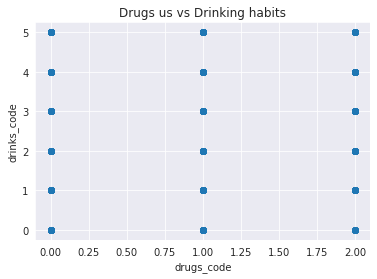

<Figure size 432x288 with 0 Axes>

In [28]:

plt.scatter(feature_data['drugs_code'],feature_data['drinks_code'])
plt.title('Drugs us vs Drinking habits')
plt.xlabel('drugs_code')
plt.ylabel('drinks_code')
plt.show()
plt.clf()

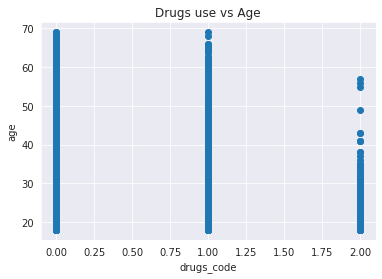

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(feature_data['drugs_code'],feature_data['age'])
plt.title('Drugs use vs Age')
plt.xlabel('drugs_code')
plt.ylabel('age')
plt.show()
plt.clf()

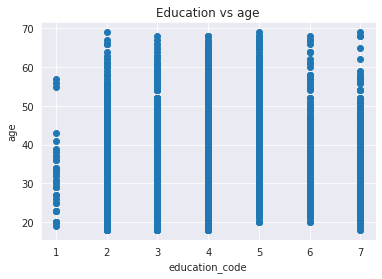

<Figure size 432x288 with 0 Axes>

In [30]:
plt.scatter(feature_data['education_code'],feature_data['age'])
plt.title('Education vs age')
plt.xlabel('education_code')
plt.ylabel('age')
plt.show()
plt.clf()

As we can see none of them are linear codependent. 

# Conclusion

The dataset used contained 59946 profiles from the dating website OKCupid. After cleaning the data and removing the empty rows only 7254 entries remained. 

Facts that we can conclude from this data:

* OKCupid Users age is in a range from 18 to 110 with the most common age of 26.

* 36% of users have an average body type, with 30% having fit body type and only 0.8% are classed themselves as overweight

* Astrological signs are distributed approximately equally overall, with the maximum amount of geminis being 700 and the minimum of 350 being virgos. 

* 45% of OKCupid Users earn more than $50,000

* Overall men consume 2.4 times more alcohol then women. 

* 58% of users are graduated from college/university, 20% are graduated from a masters programme, 4% are graduated from a Ph.D programme


My conclusions drawn from building machine learning models trained to predict gender:

* The machine learning models based on such features as: drinking and smoking habits, drug abuse, body type, income, essay lenght and the amount of times a person said 'me' or 'I' in open-ended questions are not reliable enough to make gender predictions.


* There was no particular correlation between the variables in the data that I chose to train the statistical models. 


* The K-Nearest Neighbors model showed the highest score of 76% and Random Forests model - 75%, which I think is acceptable, but theres there's still a big probability of making a mistake in making gender predictions or classifications. 


* Since there was no linear regression between the features, my Linear Regression model showed a very low score of 3%. 

We should keep in mind that this data was taken from dating profiles, users sometimes don't want to reveal to much information about themselves, leave questions without answers which are also very subjective. This makes it more complicated to use it for building reliable machine learning models. 

My next step would be an application of unsupervised machine learning algorithms as they could uncover associations between data points more subtle than what a Random forests or k-nearest neighbors analysis can uncover. 